<a href="https://colab.research.google.com/github/saivenkat2309/ML_A1/blob/main/Ass_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings


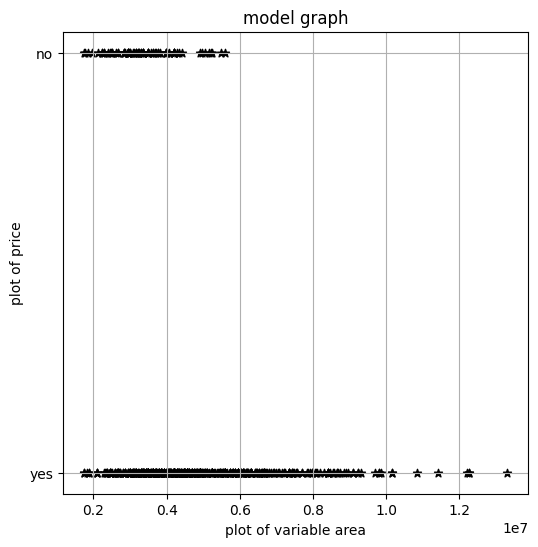

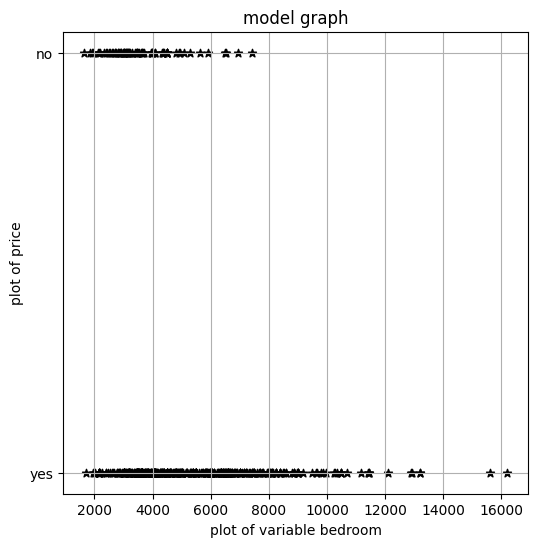

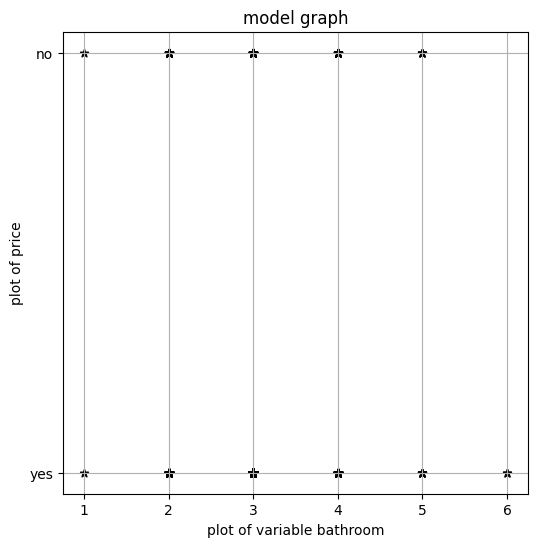

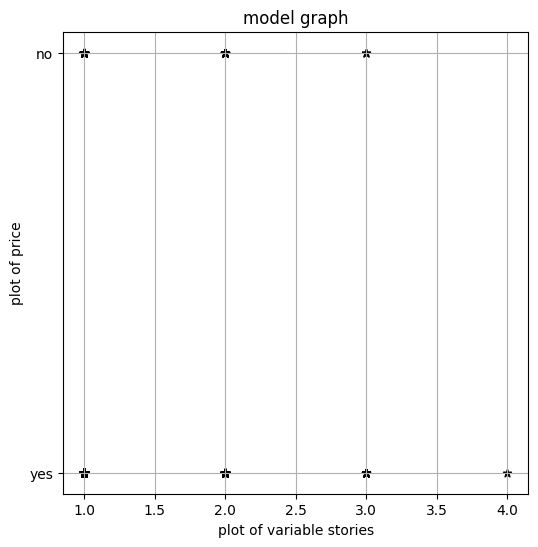

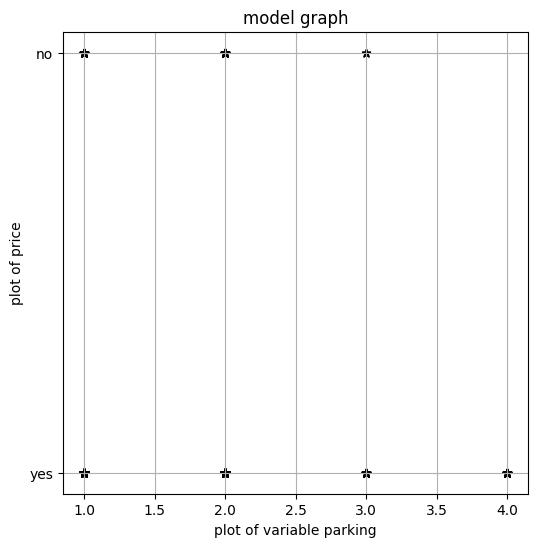

In [75]:
df = pd.read_csv('/content/sample_data/Housing.csv')
area = df.values[:,0]
bedroom = df.values[:,1]
bathroom = df.values[:,2]
stories = df.values[:,3]
parking = df.values[:,4]
price = df.values[:,5]

# Plot area
plt.scatter(area, price, color='black',marker='*')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable area')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot bedroom
plt.scatter(bedroom, price, color='black',marker='*')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable bedroom')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot bathroom
plt.scatter(bathroom, price, color='black',marker='*')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable bathroom')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot stories
plt.scatter(stories, price, color='black',marker='*')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable stories')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot parking
plt.scatter(parking, price, color='black',marker='*')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable parking')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

In [47]:
raw_df = pd.read_csv("/content/sample_data/Housing.csv")
raw_df.head()
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no':0})

raw_df[binary_cols] = raw_df[binary_cols].apply(binary_map)
raw_df

np.random.seed(0)
raw_df_train, raw_df_test = train_test_split(raw_df, test_size = 0.2)
raw_df_train.shape,raw_df_test.shape

def loss(X_values, Y_values, theta, m):


    h = X_values.dot(theta)
    err = np.subtract(h,Y_values)
    squareErr = np.square(err)
    loss_value = 1/(2*m) * np.sum(squareErr)

    return loss_value

In [48]:
def penalty_loss(X_values, Y_values, theta, m):

    h = X_values.dot(theta)
    err = np.subtract(h,Y_values)
    squareErr = np.square(err)
    penaltly_loss_value = 1/(2*m) * np.sum(squareErr)

    return penaltly_loss_value


In [49]:
def linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations):

    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)

    for i in range(iterations):
        h = X_train.dot(theta)
        err = np.subtract(h,Y_train)
        xy_dtheta = (1/m_train) * X_train.transpose().dot(err)
        theta = theta - alpha*xy_dtheta
        training_loss_hist[i] = loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = loss(X_test, Y_test, theta, m_test)
    return theta, training_loss_hist, validation_loss_hist

In [50]:
def penalty_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, penalty, iterations):

    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)

    for i in range(iterations):
        h = X_train.dot(theta)

        err = np.subtract(h,Y_train)

        xy_dtheta = (1/m_train) * X_train.transpose().dot(err)

        theta = theta*(1-alpha*penalty/m_train) - alpha*xy_dtheta

        training_loss_hist[i] = penalty_loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = penalty_loss(X_test, Y_test, theta, m_test)

    return theta, training_loss_hist, validation_loss_hist

In [51]:
def feature_scaling(raw_df_train, raw_df_test, categorical_cols, scaler):


    df_nrm_train = raw_df_train

    df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
    df_nrm_train[categorical_cols] = scaler.fit_transform(raw_df_train[categorical_cols])

    Y_nrm_train = df_nrm_train[['price']].to_numpy()

    m_nrm_train = len(Y_nrm_train)

    X_nrm_train = df_nrm_train[categorical_cols].to_numpy()
    X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))

    df_nrm_test = raw_df_test

    df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
    df_nrm_test[categorical_cols] = scaler.fit_transform(df_nrm_test[categorical_cols])

    Y_nrm_test = df_nrm_test[['price']].to_numpy()

    m_nrm_test = len(Y_nrm_test)

    X_nrm_test = df_nrm_test[categorical_cols].to_numpy()
    X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))

    return X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test
categorical_cols_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Y_train = raw_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = raw_df_train[categorical_cols_1].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = raw_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = raw_df_test[categorical_cols_1].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))


In [52]:
iterations = 700
alpha = 0.000000001

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)


Text(0.5, 1.0, '1A: Training Loss per Iteration')

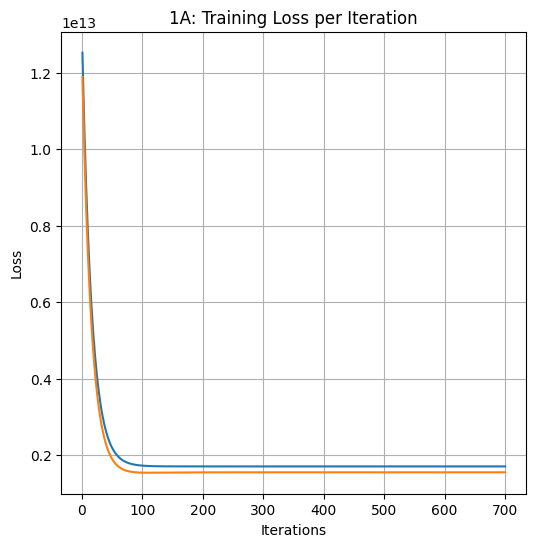

In [53]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1A: Training Loss per Iteration')




In [54]:
categorical_cols_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

Y_train = raw_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = raw_df_train[categorical_cols_2].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = raw_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = raw_df_test[categorical_cols_2].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [55]:
iterations = 750
alpha = 0.000000001

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)


Text(0.5, 1.0, '1B: Training Loss per Iteration')

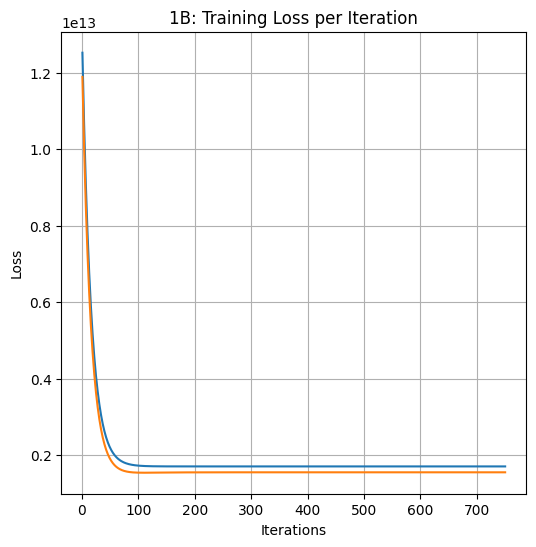

In [56]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1B: Training Loss per Iteration')



In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(raw_df_train[categorical_cols_1])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))

In [58]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))

In [59]:
iterations = 2000
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


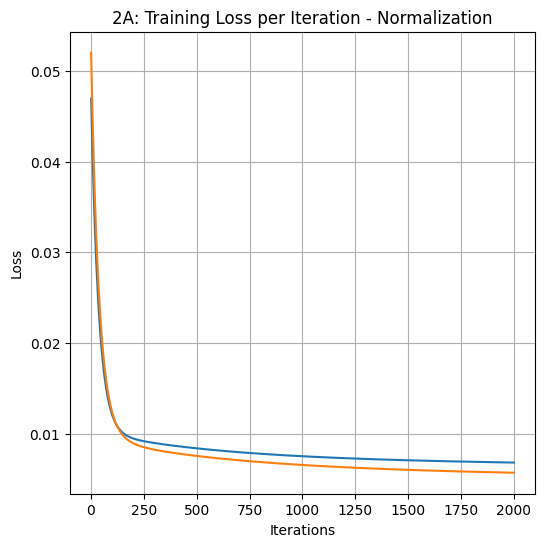

In [60]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2A: Training Loss per Iteration - Normalization')

scaler = StandardScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(raw_df_train[categorical_cols_1])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))

In [61]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))

In [62]:
iterations = 2200
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2A: Training Loss per Iteration - Standardization')

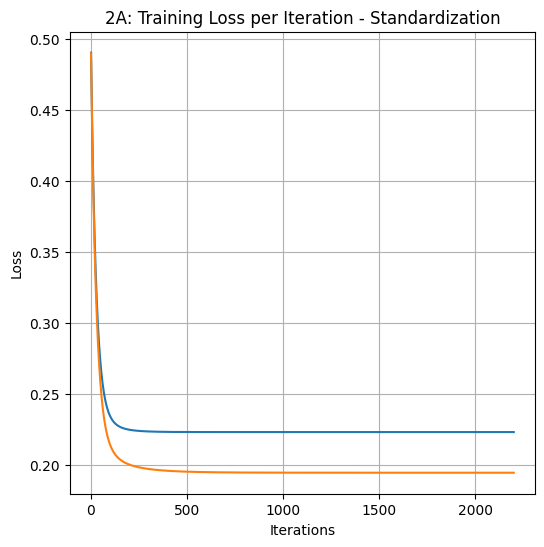

In [63]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2A: Training Loss per Iteration - Standardization')


In [64]:
scaler = MinMaxScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(raw_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [65]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [66]:
iterations = 4300
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)

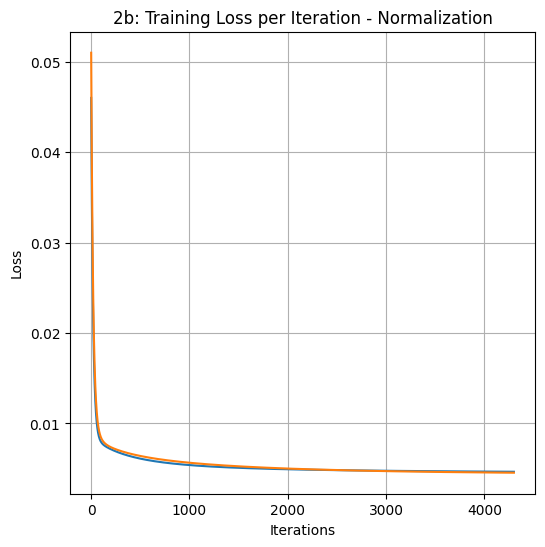

In [67]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2b: Training Loss per Iteration - Normalization')

scaler = StandardScaler()

df_nrm_train = raw_df_train

df_nrm_train[['price']] = scaler.fit_transform(raw_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(raw_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))

In [68]:
df_nrm_test = raw_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [69]:
iterations = 2100
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)

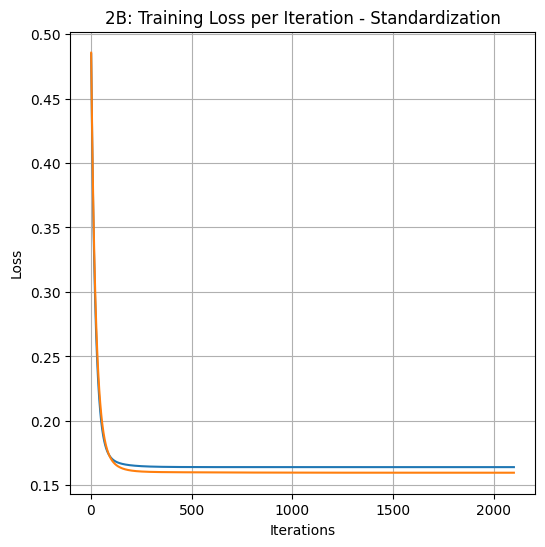

In [70]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2B: Training Loss per Iteration - Standardization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(raw_df_train, raw_df_test, categorical_cols_1, MinMaxScaler())


In [71]:
iterations = 4300
penalty = 1
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = penalty_linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, penalty, iterations)


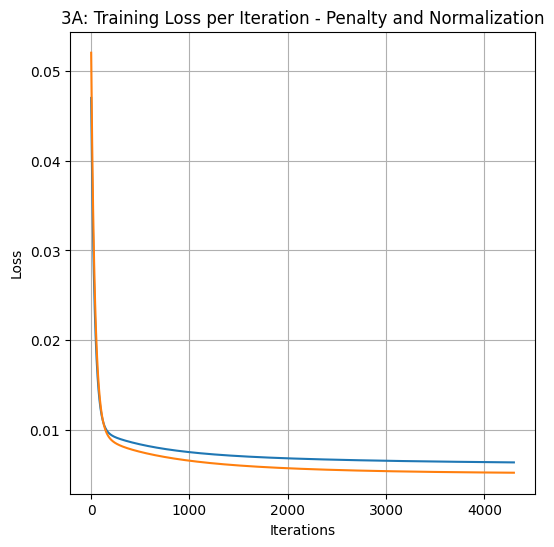

In [72]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3A: Training Loss per Iteration - Penalty and Normalization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(raw_df_train, raw_df_test, categorical_cols_2, MinMaxScaler())


In [73]:
iterations = 4000
penalty = 10
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = penalty_linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, penalty, iterations)


Text(0.5, 1.0, '3B: Training Loss per Iteration - Penalty and Normalization')

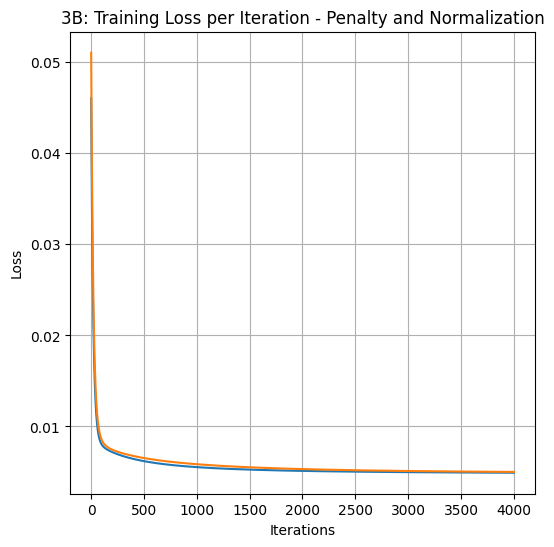

In [74]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3B: Training Loss per Iteration - Penalty and Normalization')